In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
</style>
<style>
span.toc-item-num{
display:none;
}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format= "retina"
#패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지
# warnig 감추기
import warnings
warnings.filterwarnings(action='ignore') #안보이게
#warnings.filterwarnings(action='default') #보이게



# 3절. Seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리 <br>
• 공식사이트 : https://seaborn.pydata.org <br>
• seaborn API : https://seaborn.pydata.org/api.html <br>
- Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다. 
    1) 데이터 준비 <br>
    2) 미적속성 설정 <br>
    3) 함수를 이용하여 그래프 그리기(관계형-수치형,범주형, 쌍관계, 밀도, 회귀, 다중그래프) <br>
    4) 그래프 출력(show), 저장(savefig) <br>


## 3.2 데이터 준비하기
- iris, titanic

In [3]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.info() # dtype,전체행수, 열별결측치를 제외한 데이터수, 메모리사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#열별 결측치 수 
iris.isna()
iris.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      sepal_length  sepal_width  petal_length  petal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

In [6]:
iris['species'].unique() #범주형 데이터들 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()
#Survived : 0 = 사망, 1 = 생존
#Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
#Sex : male = 남성, female = 여성
#Age : 나이
#SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
#Parch : 타이타닉 호에 동승한 부모 / 자식의 수
#Ticket : 티켓 번호
#Fare : 승객 요금
#Cabin : 방 호수
#Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 3.2 미적 속성 설정하기 (style,context,palette,figsize...)
### 1) 그래프 스타일 지정
- 폰트 초기화로 한글설정과 같이 함수 사용
- plt.rc('font',family='Malgun Gothic') # 윈도우즈
- plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지
- 

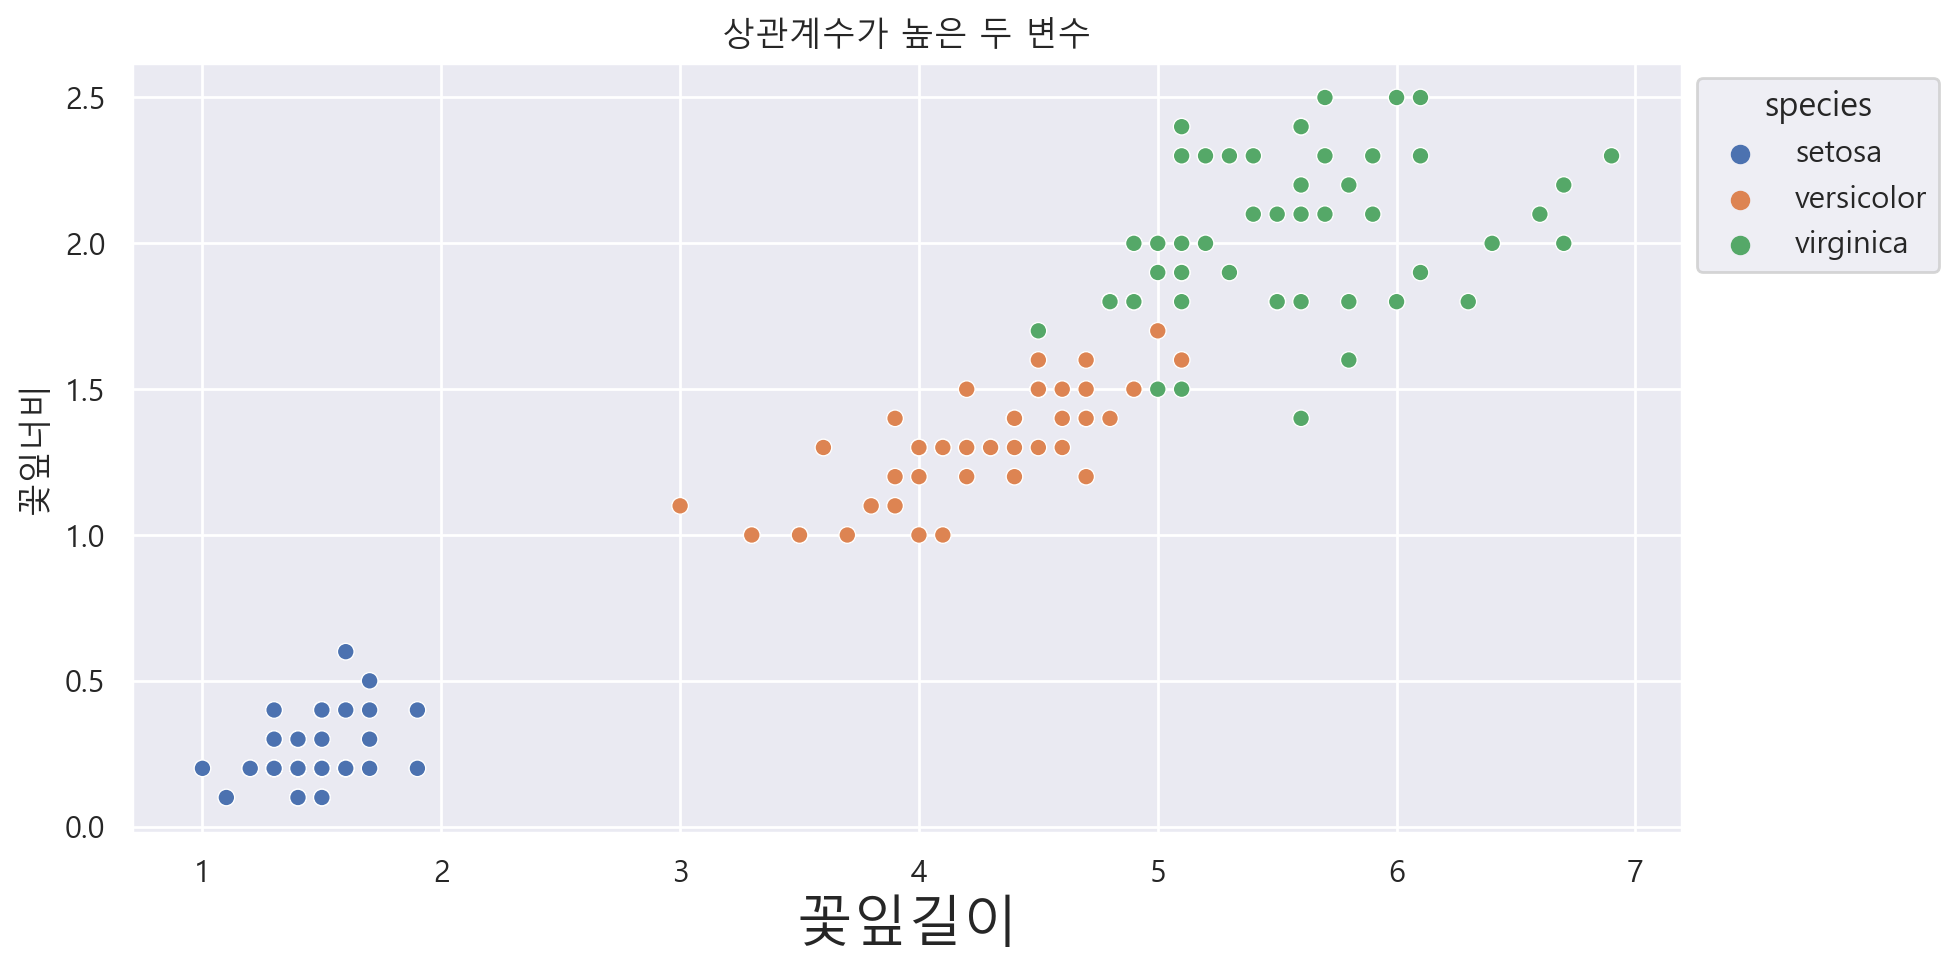

In [10]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid') # darkgrid,whitegrid,dark, ticks
# sns.set 함수를 수행하면 기존의 설정이 초기화
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지

ax = sns.scatterplot(data=iris, x= 'petal_length',y='petal_width',hue='species')
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
ax.set(title='상관계수가 높은 두 변수',
      ylabel='꽃잎너비')
ax.set_xlabel('꽃잎길이',fontsize=20)
plt.show()

### 2)컨텍스트 지정(배율)

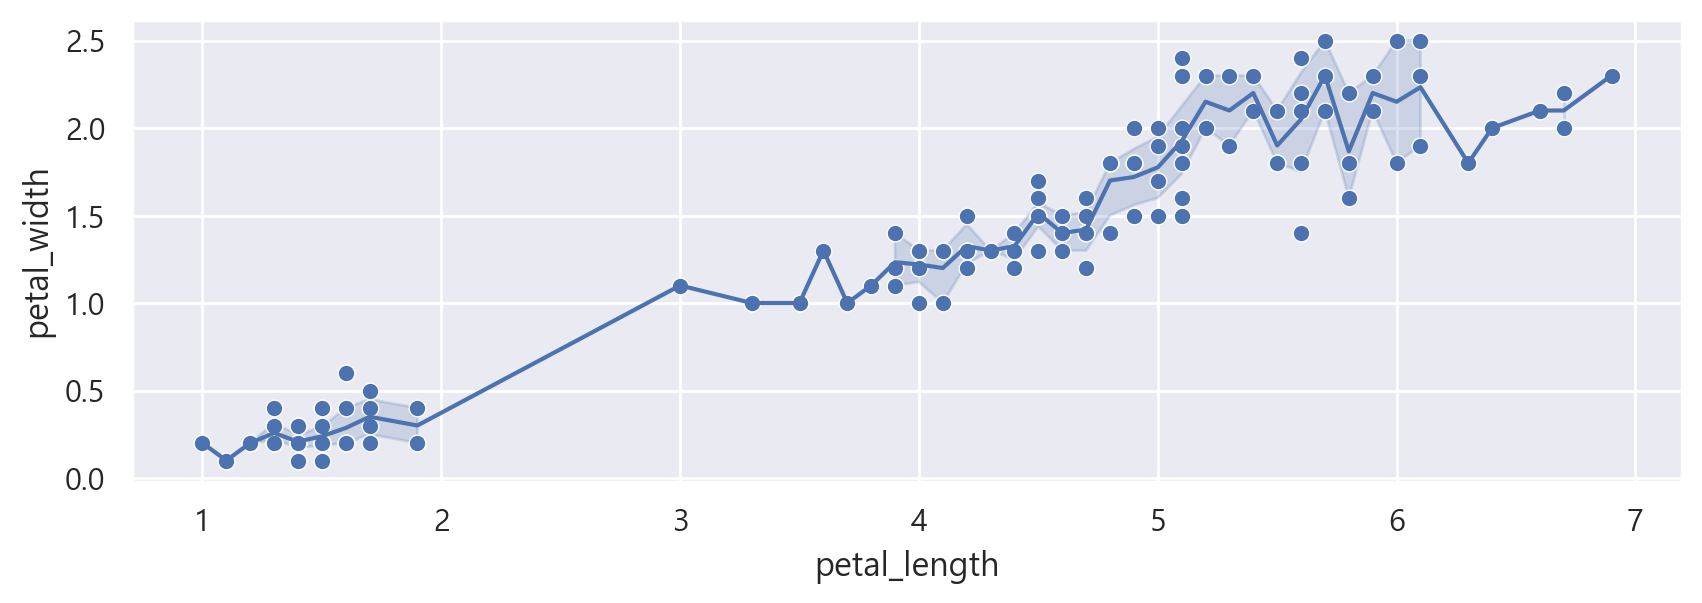

In [34]:
plt.figure(figsize=(10,3))
#sns.set(context='notebook') # 기본값(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
sns.lineplot(data= iris, x='petal_length',y='petal_width')
sns.scatterplot(data= iris, x='petal_length',y='petal_width')
plt.show()

3) 컬러팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
            

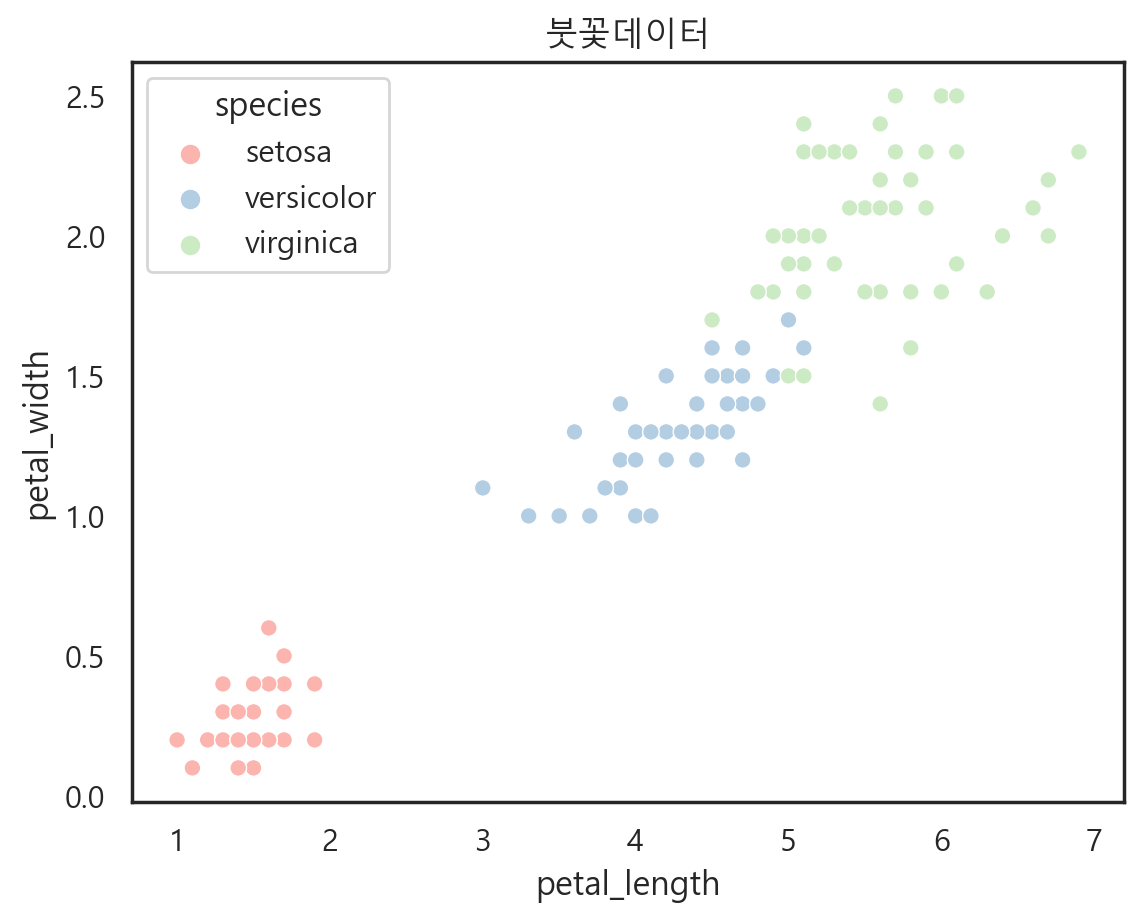

In [12]:
sns.set(palette='Pastel1',style='white',context='notebook') # 기본 미적 속성 설정
# sns.set 함수를 수행하면 기존의 설정이 초기화
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지

ax=sns.scatterplot(data= iris,x='petal_length',y='petal_width',hue='species')
ax.set_title('붓꽃데이터')
plt.show()

In [14]:
sns.set(style='darkgrid',
        context='notebook',
        palette='Set1',
       rc={'figure.figsize':(4,3)})

## 3.3 Seaborn 함수로 그래프 그릭
### 1) 관계형 그래프
    *scatterplot,lineplot,relplot(서브플롯제공)

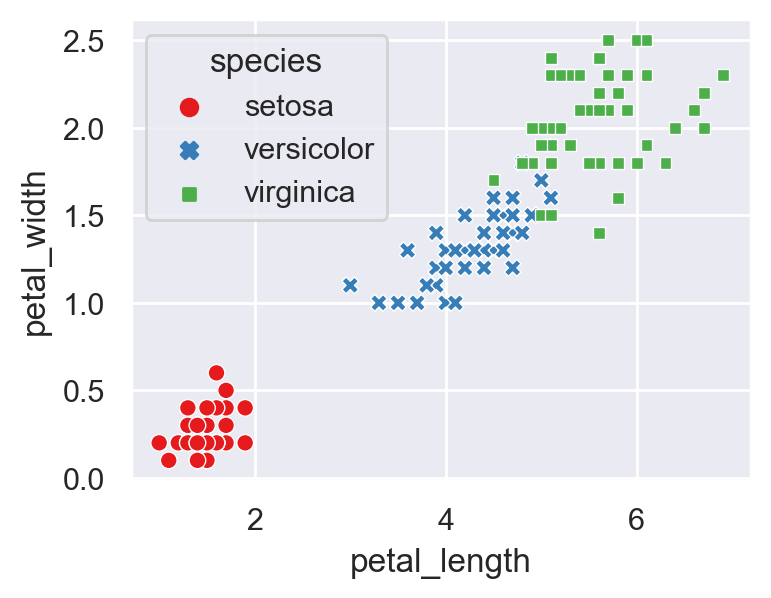

In [17]:
# 종별 다른 색상과 다른 스타일의 scatterplot
sns.scatterplot(data=iris,x='petal_length',y='petal_width',hue='species',
               palette='Set1',style='species')
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

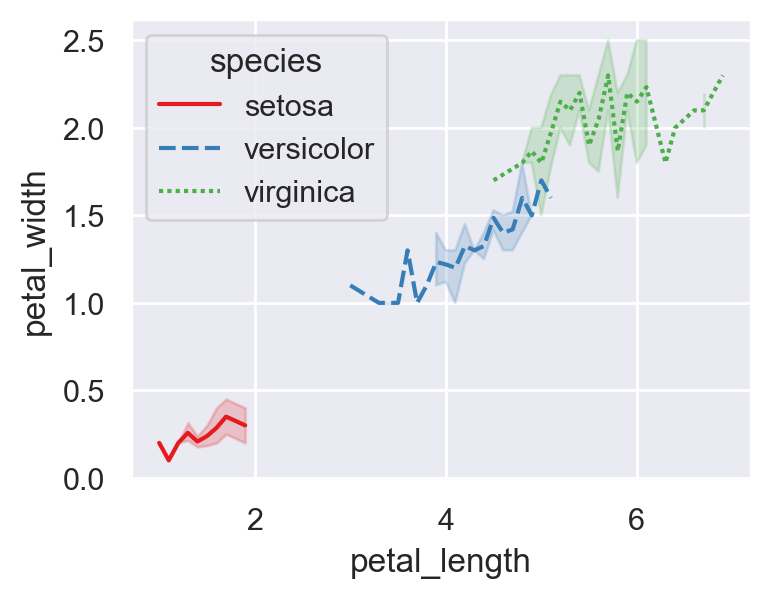

In [22]:
# 종별로 다른 색상과 스타일의 lineplot
sns.lineplot(data=iris,x='petal_length',y='petal_width',hue='species',
            style='species', palette='Set1')

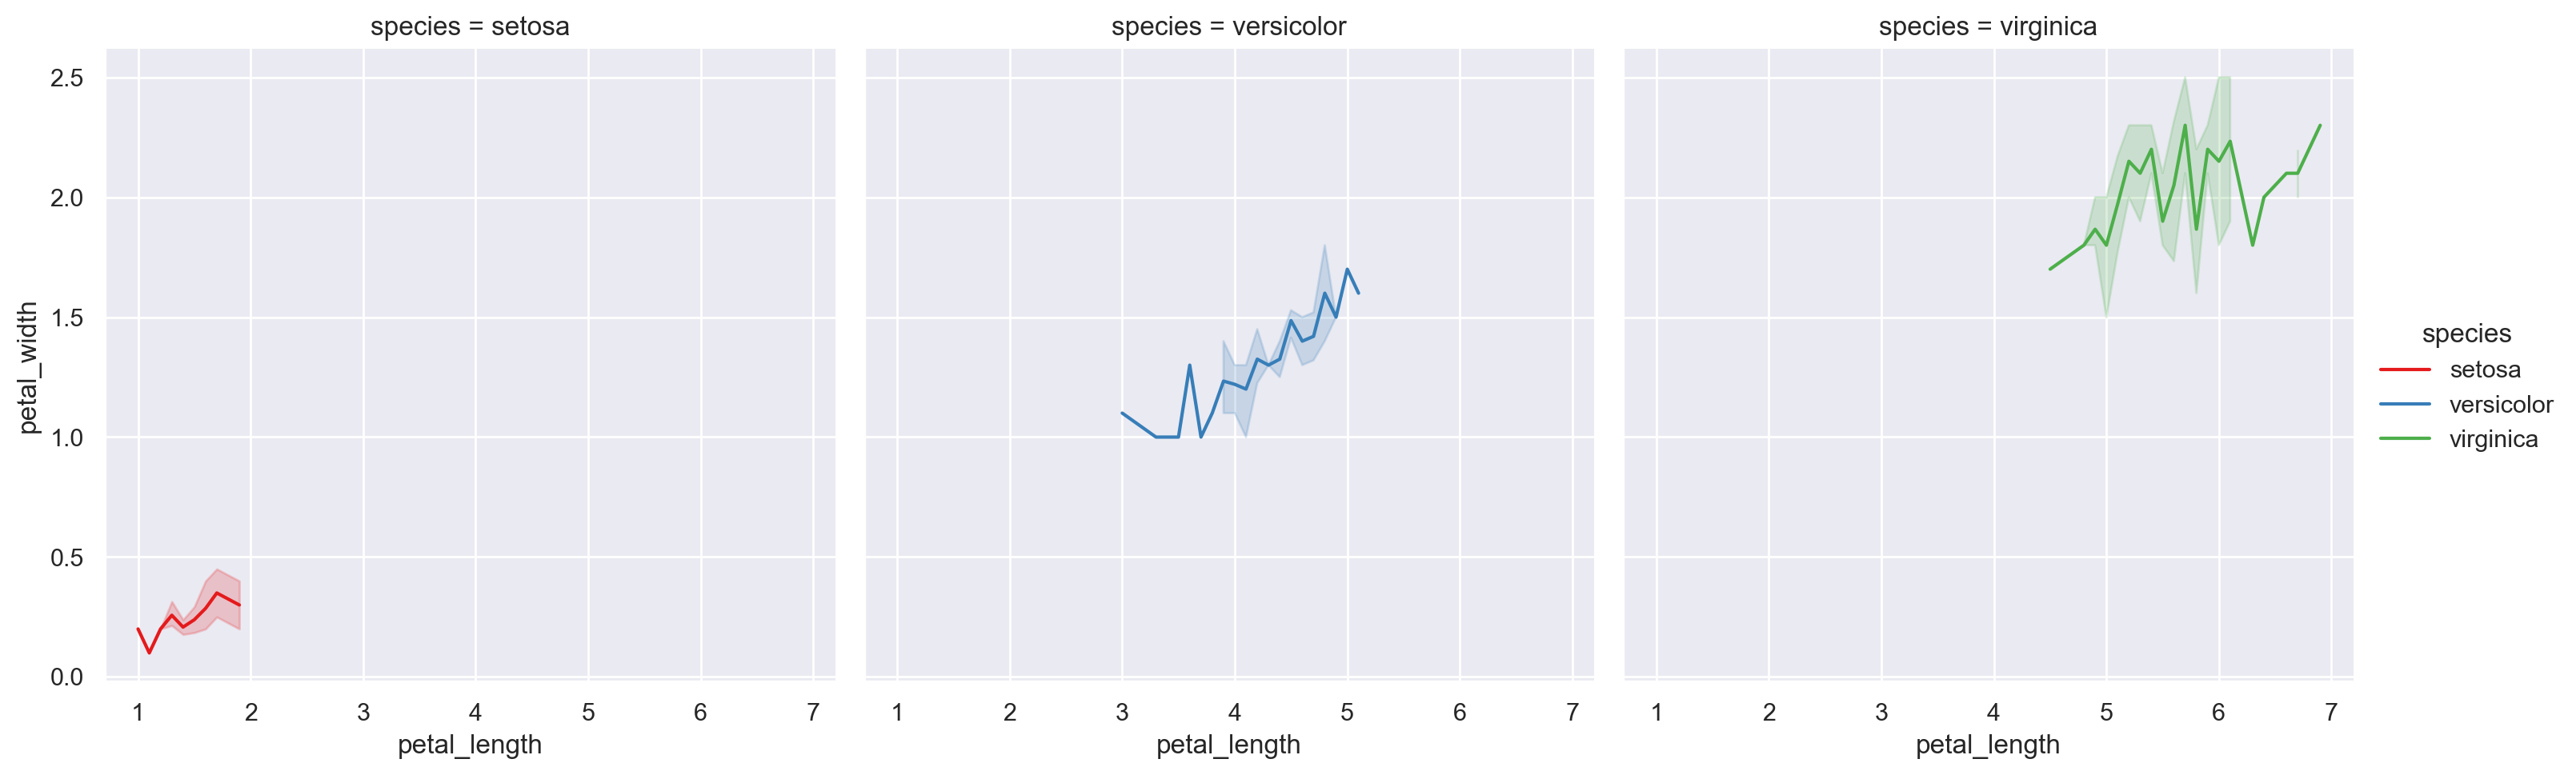

In [24]:
# 종별 lineplot을 서브플롯으로 => relplot(관계형 그래프에서 서브플롯 그리는 함수)
sns.relplot(data= iris, x='petal_length',y='petal_width',hue='species',
           kind='line',# 서브플롯으로 그려질 그래프 종류(기본값:line)
            col='species',# col단위로 서브플롯 표현
            #col_wrap=2 # 한줄에 표현될 서브 플롯 수
           )
plt.show()

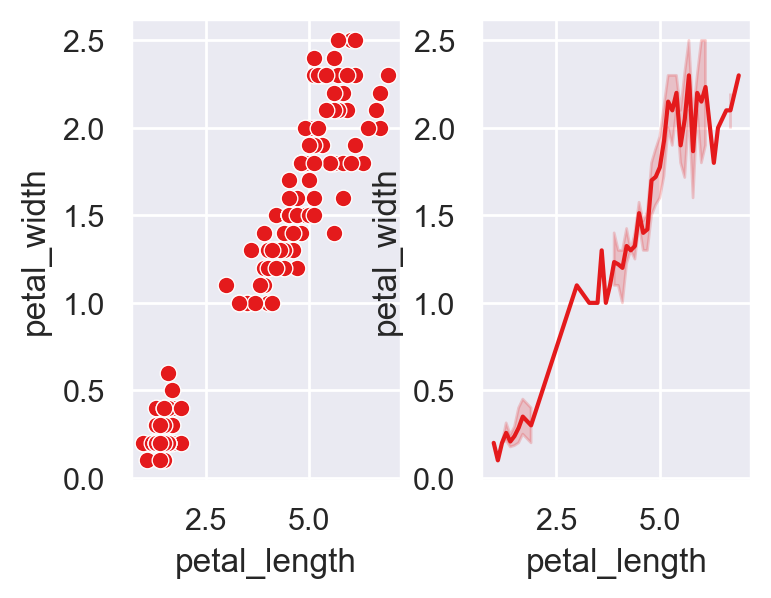

In [26]:
# ax[0]산점도, ax[1]에는 lineplot
fig,ax= plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.3) # 서브 플롯 사이의 공백 조정
sns.scatterplot(data=iris, x='petal_length',y='petal_width',ax=ax[0])
sns.lineplot(data=iris, x='petal_length',y='petal_width',ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot, swarmplot, barplot,barhplot, countplot, pointplot,
- boxplot, violinplot,boxenplot => catplot(서브플롯)


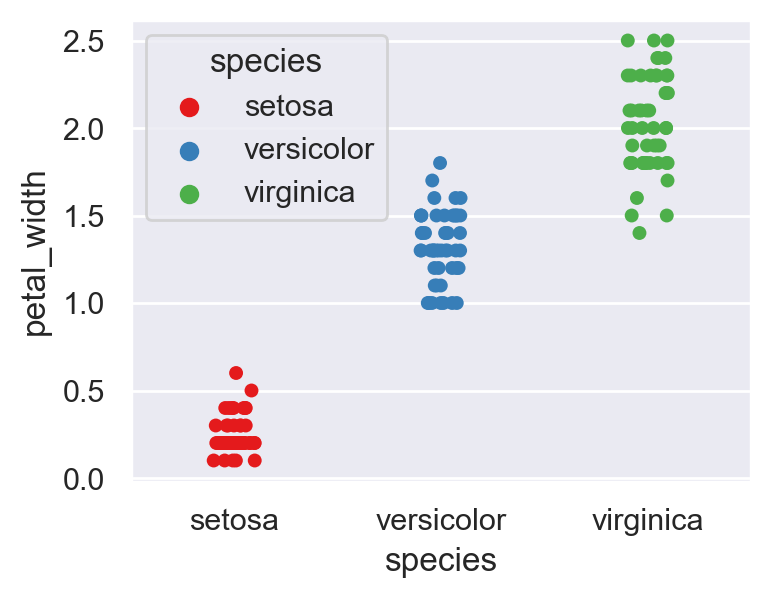

In [52]:
sns.stripplot(data=iris,x='species', y='petal_width',hue='species')
# hue 속성이 있을경우 palette가능
plt.show()

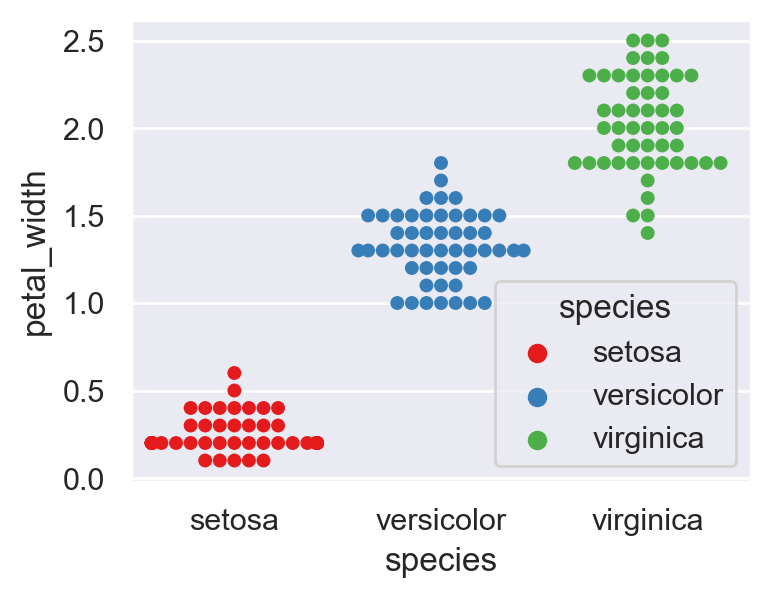

In [54]:
# x 축이 범주형일때의 산점도(중첩되지 않게)
sns.swarmplot(data=iris,x='species', y='petal_width',hue='species')
plt.show()

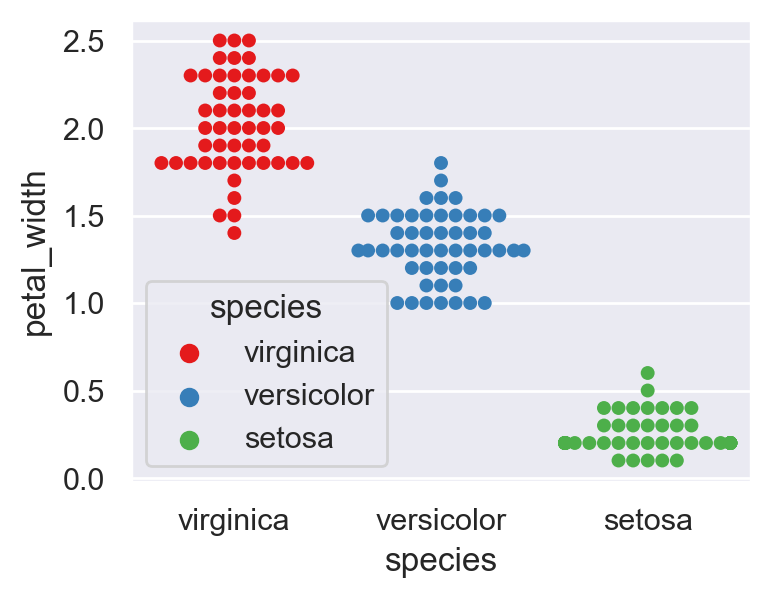

In [56]:
sns.swarmplot(data=iris.sort_values('petal_width',ascending=False),
             x='species', y='petal_width',hue='species')
plt.show()

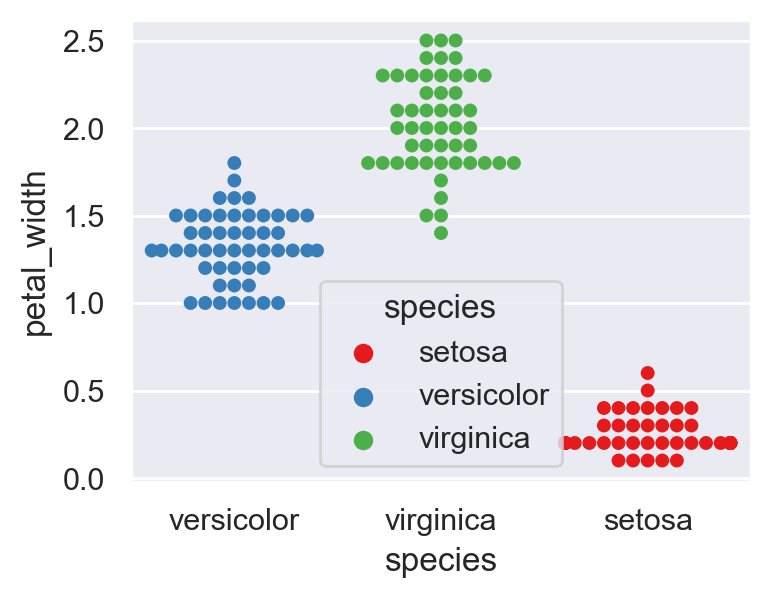

In [57]:
# 산점도의 x축 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris,
             x='species', y='petal_width',hue='species',
             order=['versicolor','virginica','setosa'])
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

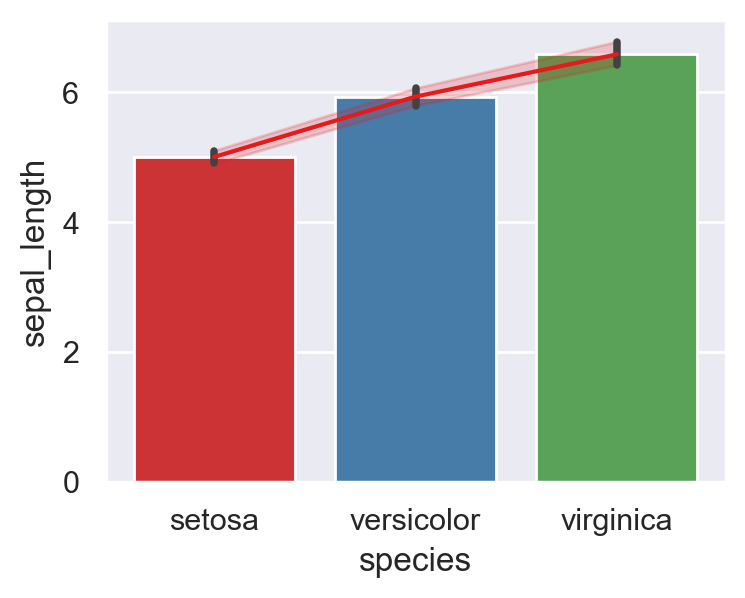

In [59]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간
#           신뢰구간 제외 : ci(confidence interval) None,errorbar=None
sns.barplot(data=iris,x='species', y='sepal_length')

sns.lineplot(data=iris,x='species', y='sepal_length')

<Axes: xlabel='sex', ylabel='survived'>

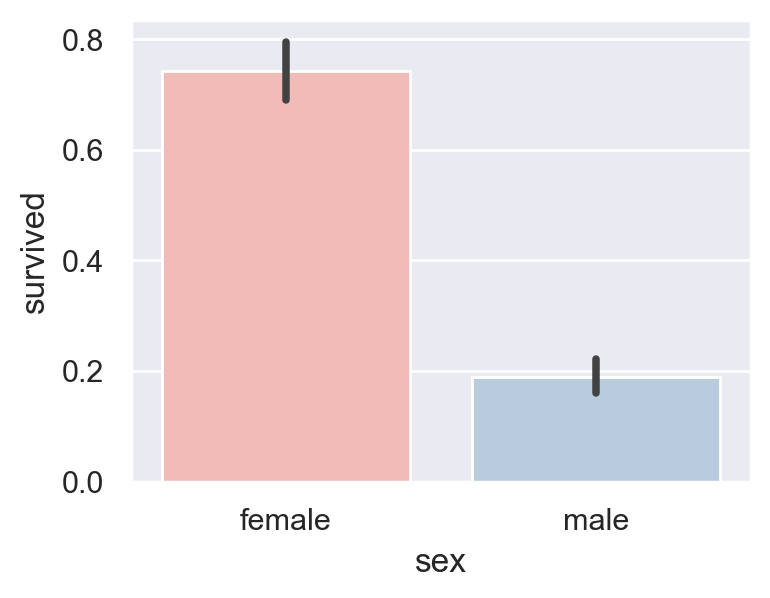

In [64]:
# 성별 survived의 평균을 막대그래프
sns.barplot(data=titanic,x='sex',y='survived',
            order=['female','male']
            ,palette='Pastel1')


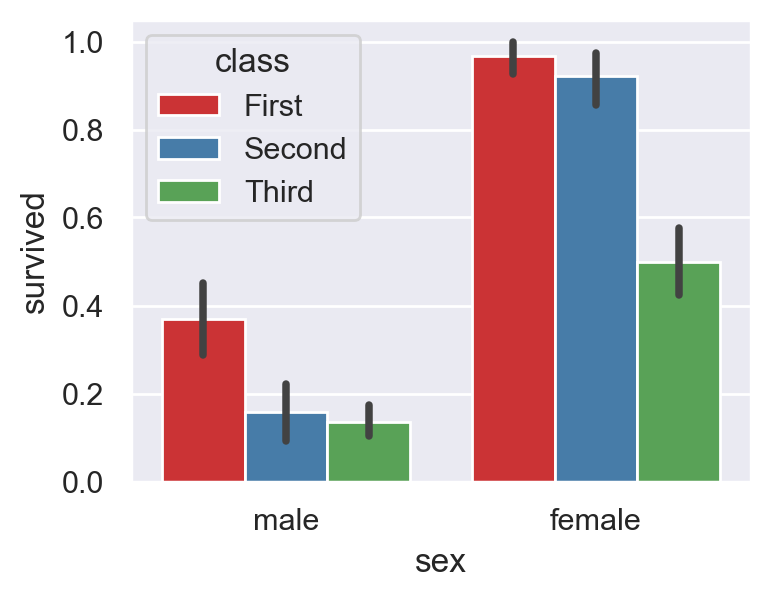

In [68]:
# class 별로 성별 생존률을 하나의 막대 그래프
sns.barplot(data=titanic,x='sex',y='survived',hue='class')
plt.show()

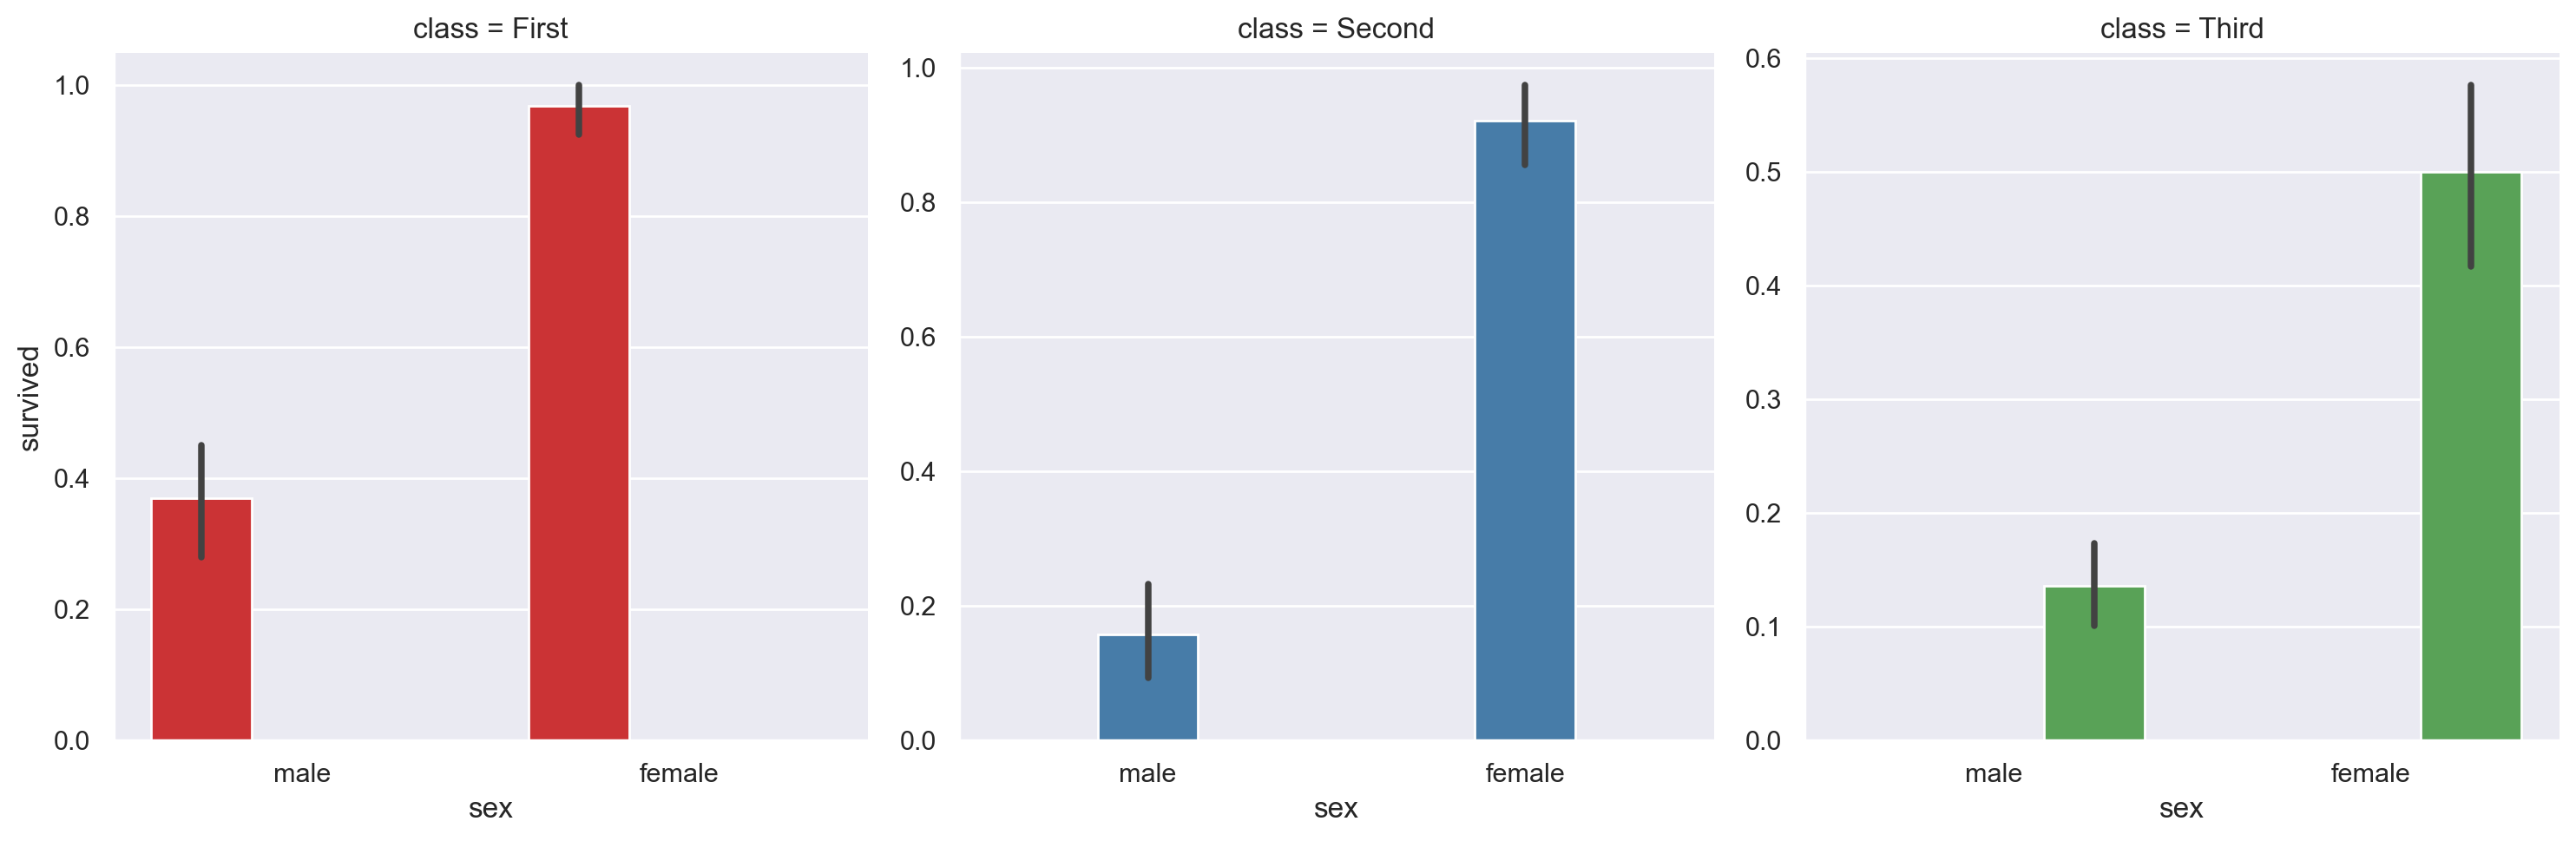

In [69]:
# class 별로 성별 생존율을 서브 플롯(막대그래프)
sns.catplot(data=titanic,x='sex',y='survived',hue='class',
           kind= 'bar',# 기본값은 stripplot
            col='class', # col단위로 서브플롯 표현
            sharey=False
            #col_wrap=2, 기본값은 한행에 모든 서브 플롯 표현
           )

In [70]:
titanic.deck.unique()# 데이터 종류들

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

<Axes: xlabel='deck', ylabel='count'>

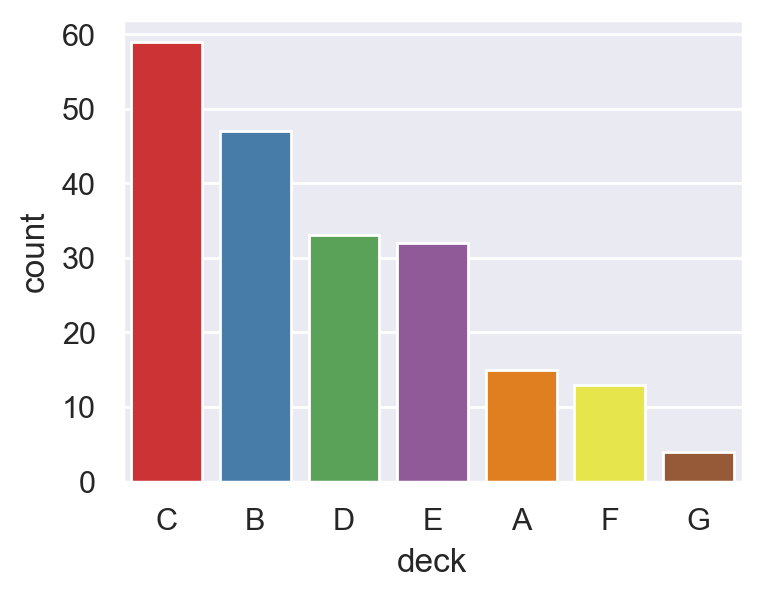

In [87]:
result= titanic.deck.value_counts() # 범주별 데이터갯수
sns.countplot(data=titanic,x='deck',order=result.index)

<Axes: xlabel='deck', ylabel='count'>

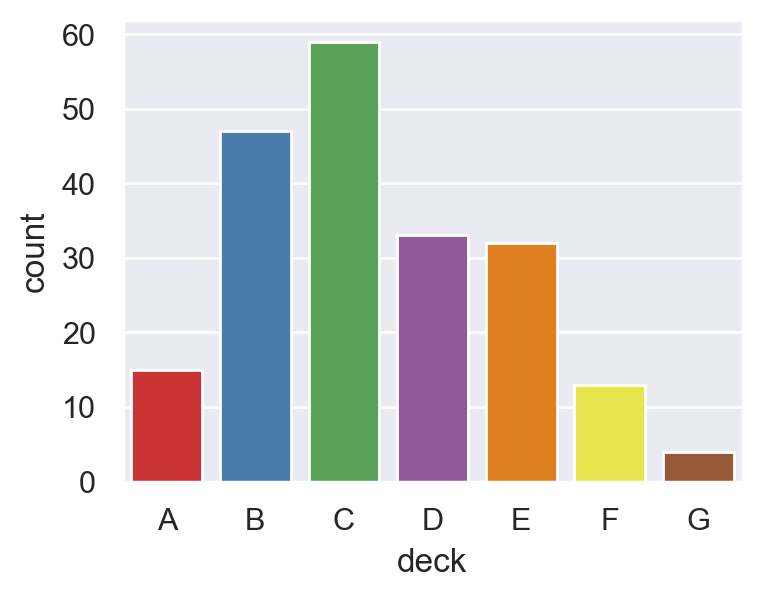

In [73]:
# deck별 관측수를 막대그래프(countplot)
sns.countplot(data=titanic,x='deck')

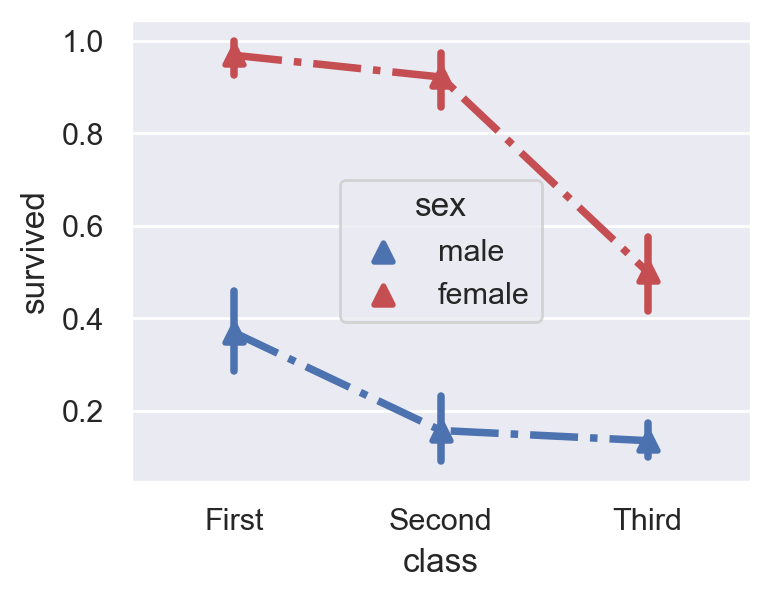

In [86]:
# class 별,성별별 survived 값을 pointplot
sns.pointplot(data= titanic,x='class',y='survived',hue='sex',
             markers=['^','^'],
             linestyles=['-.','-.'],
             palette={'male':'b','female':'r'})
plt.show()

<Axes: xlabel='sex', ylabel='age'>

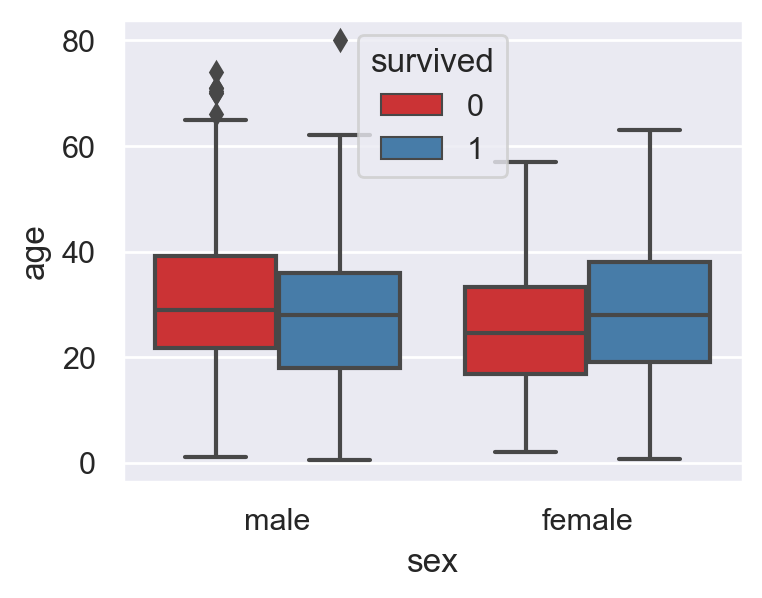

In [89]:
# boxplot
sns.boxplot(data=titanic,x ='sex',y='age',hue='survived')

<Axes: xlabel='sex', ylabel='age'>

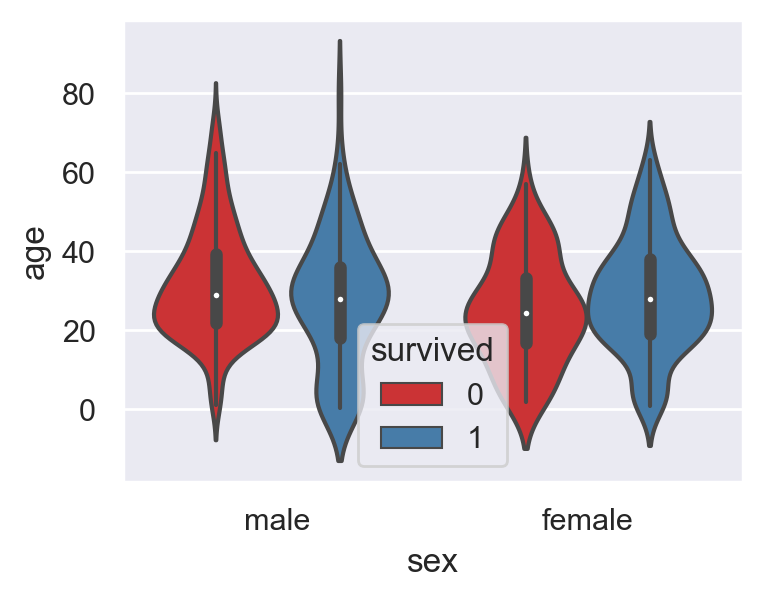

In [90]:
sns.violinplot(data=titanic,x ='sex',y='age',hue='survived')

<Axes: xlabel='age', ylabel='sex'>

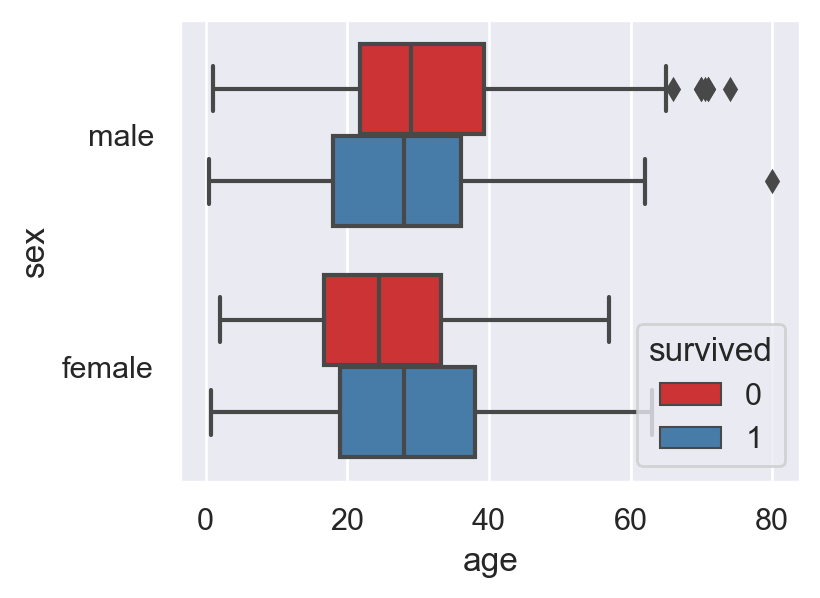

In [92]:
sns.boxplot(data=titanic,y ='sex',x='age',hue='survived')

### 3) 쌍관계 그래프
- pairplot : 데이터 프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatterplot)와 히스토그램을 보여줌

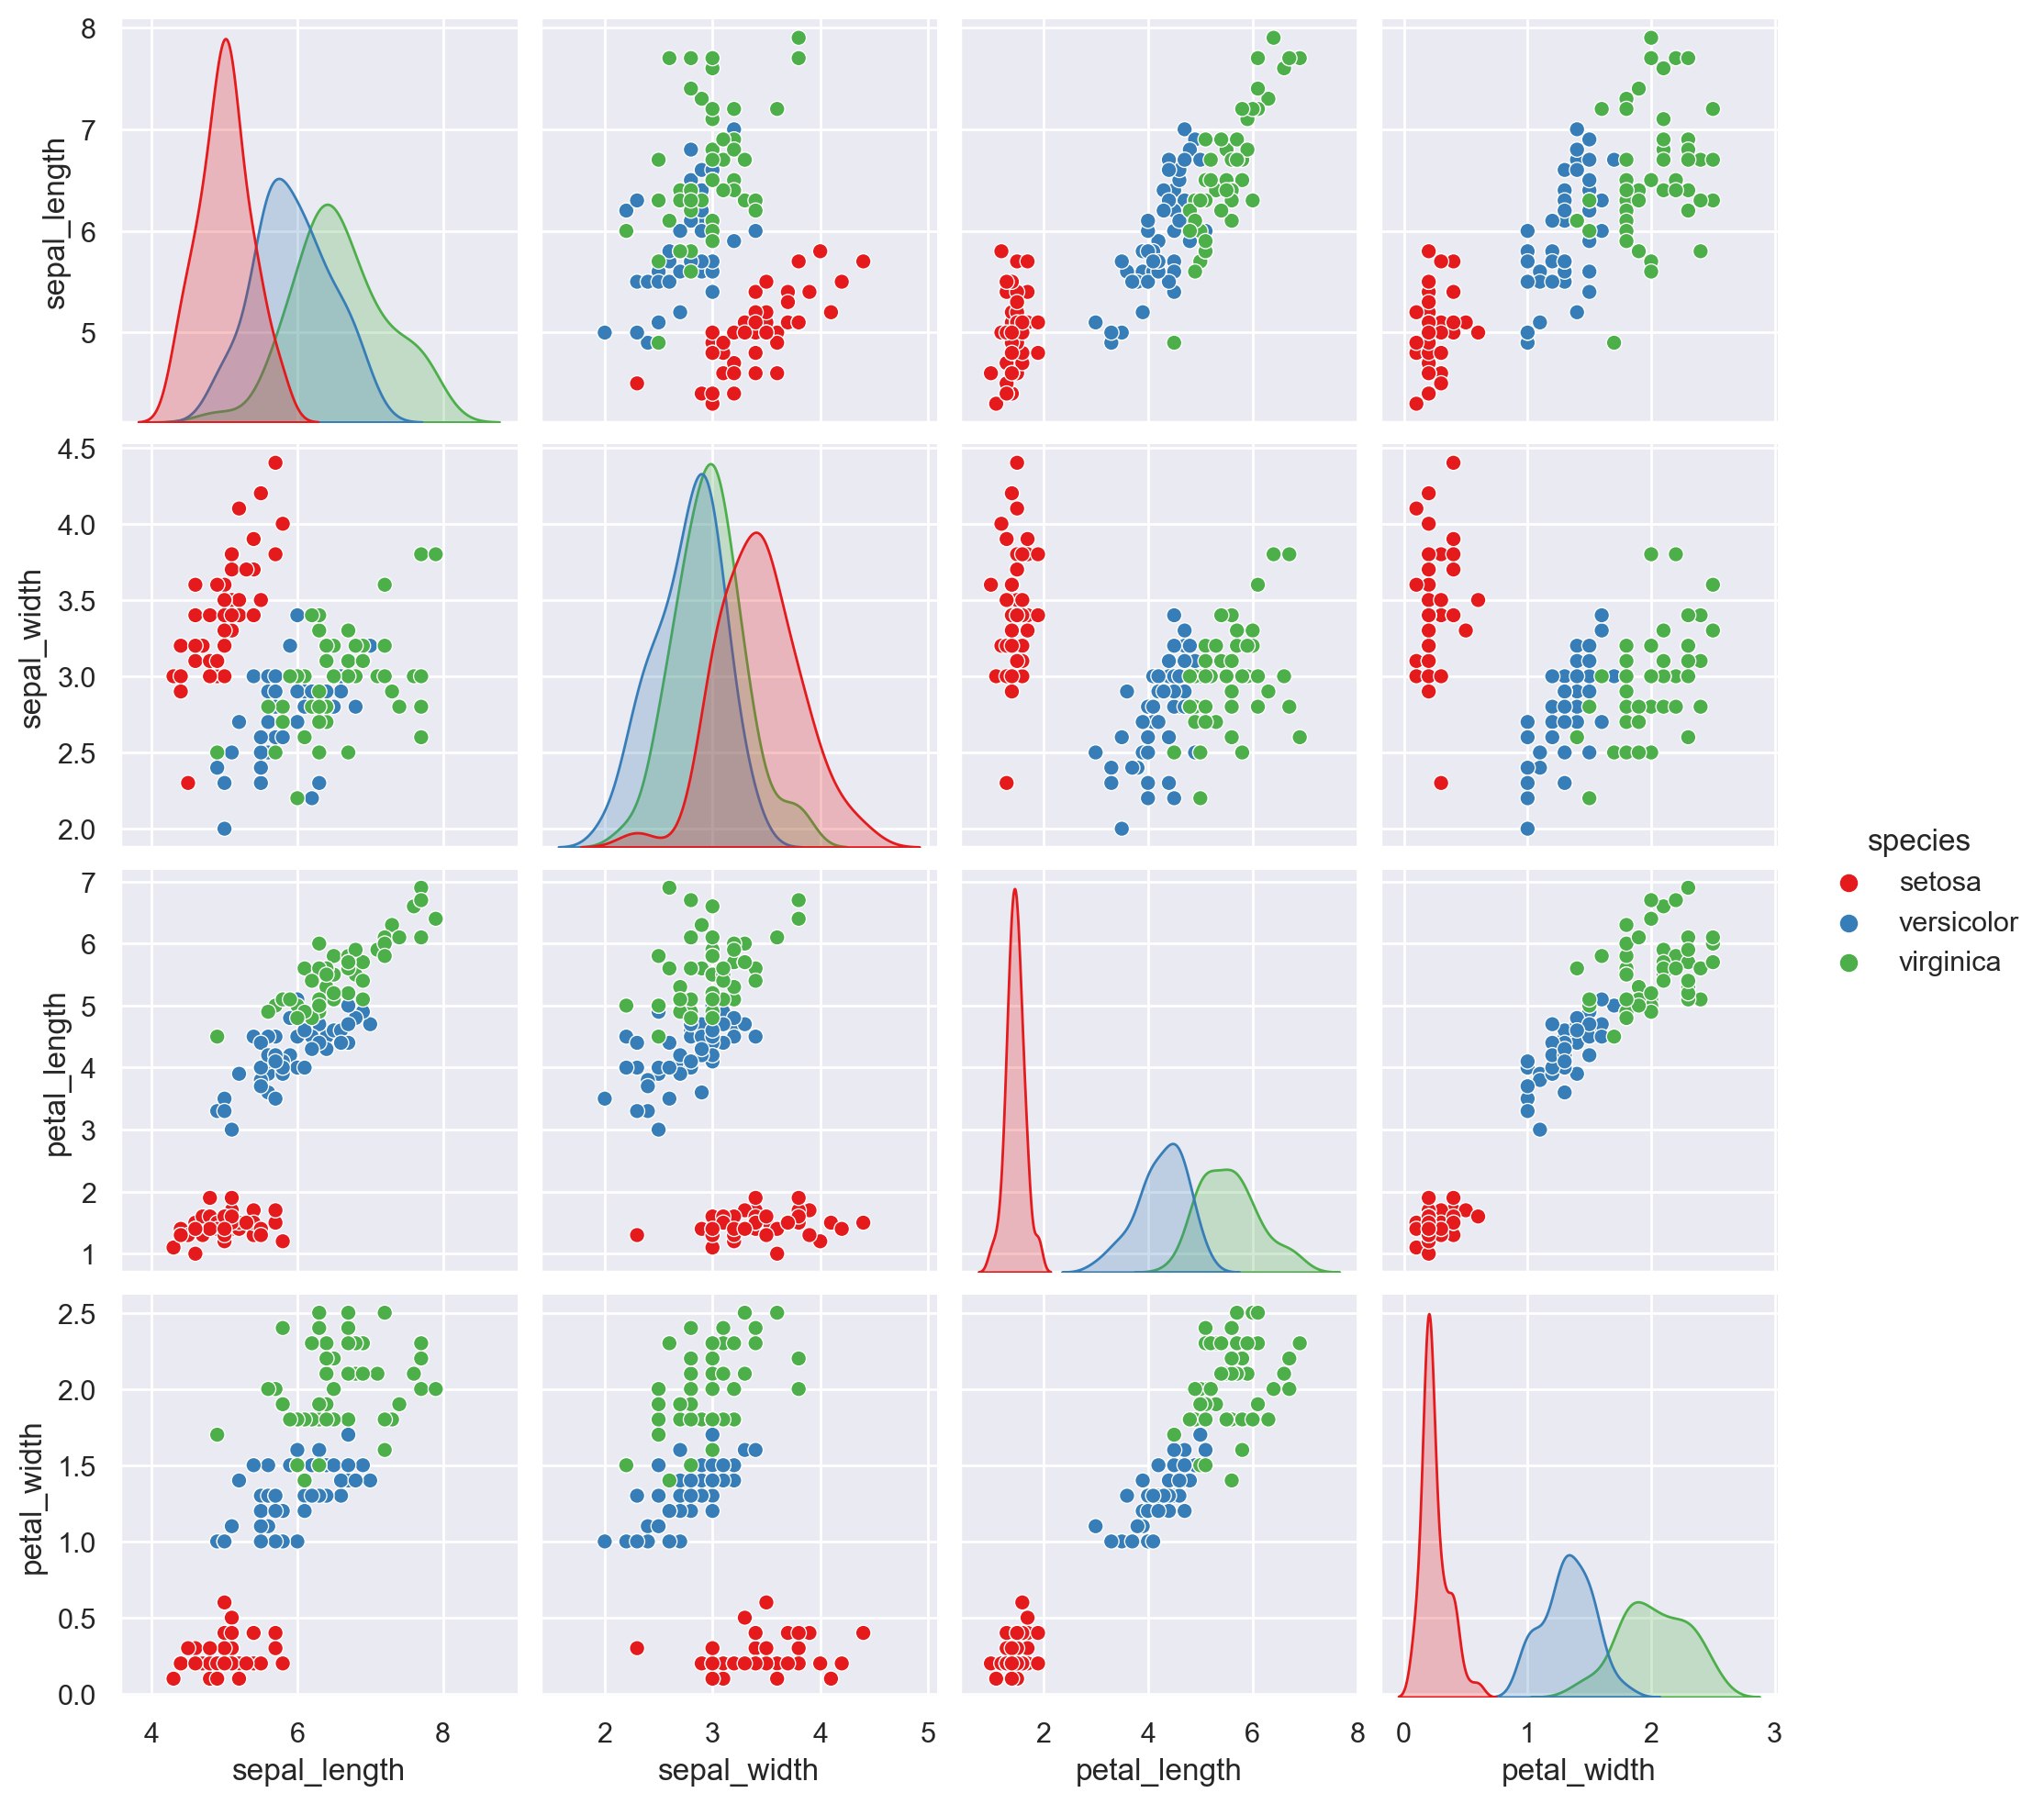

In [96]:
sns.pairplot(data=iris,hue='species')
plt.show()

### 4) 밀도그래프

In [104]:
import numpy as np
x = np.random.randn(1000) # 평균 0, 표준편차 1인 정규분포로 1000개 데이터를 배열

<Axes: ylabel='Count'>

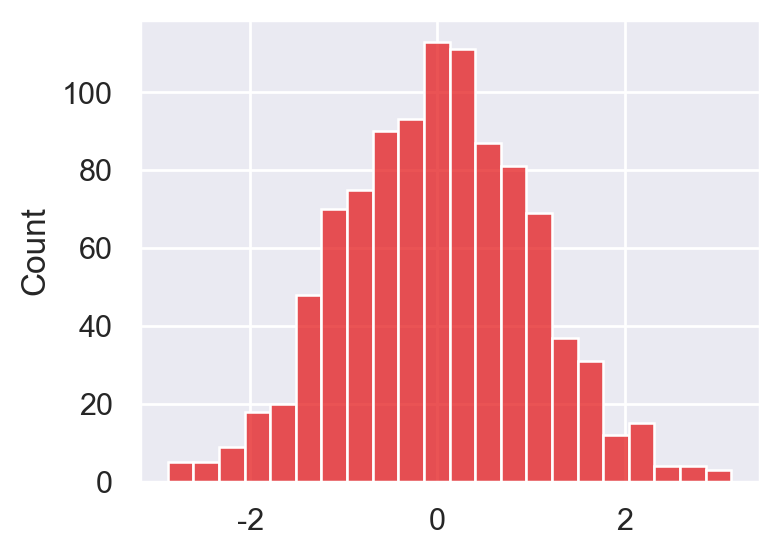

In [105]:
sns.histplot(x,kde=False) # kde=False: 분포를 매끄럽게


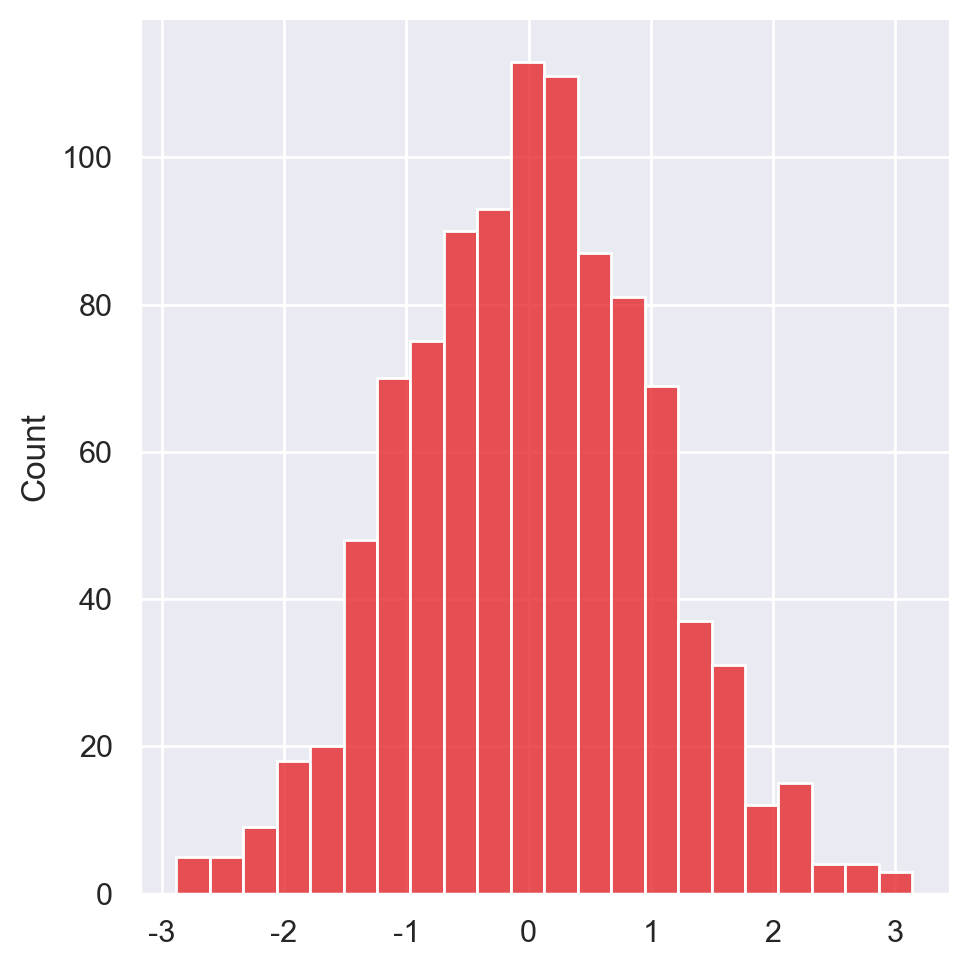

In [106]:
sns.displot(x)

### 5) 회귀 그래프

In [109]:
r=iris.corr(numeric_only=True)

<Axes: >

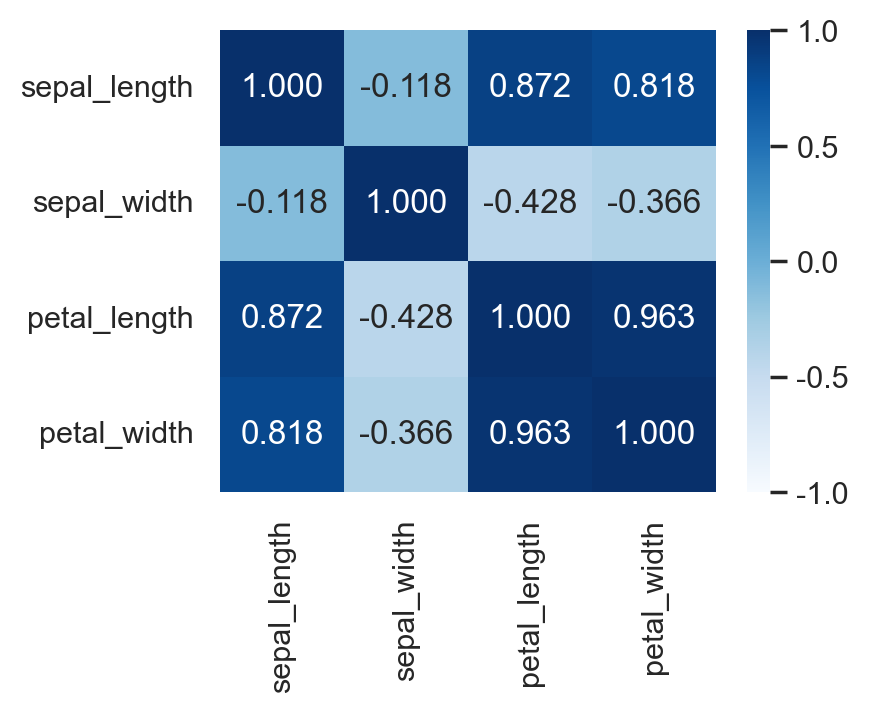

In [112]:
sns.heatmap(r,vmin=-1,vmax=1,annot=True,fmt='.3f',cmap='Blues')

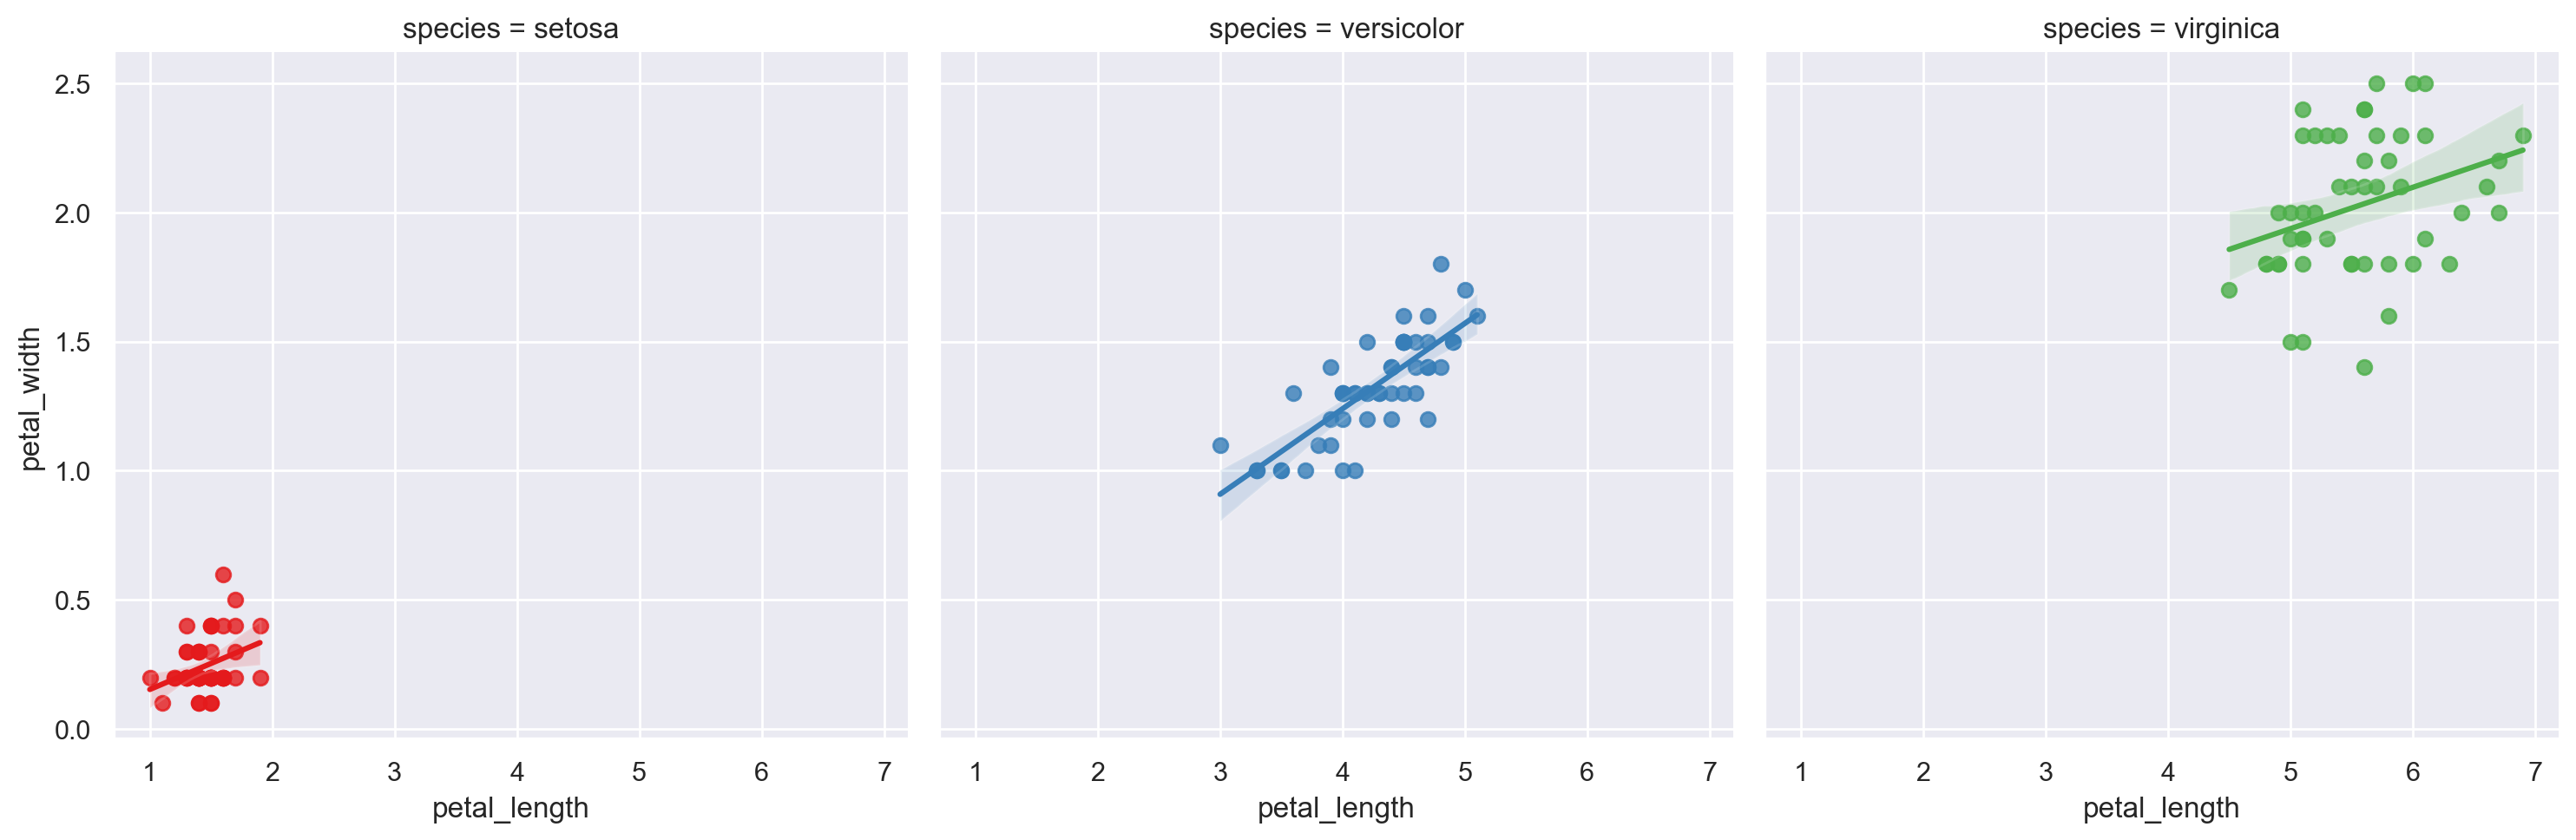

In [114]:
sns.lmplot(data=iris, x='petal_length',y='petal_width',hue='species',col='species')
plt.show()

## 4. 다중 그래프를 위한 Facetgrid

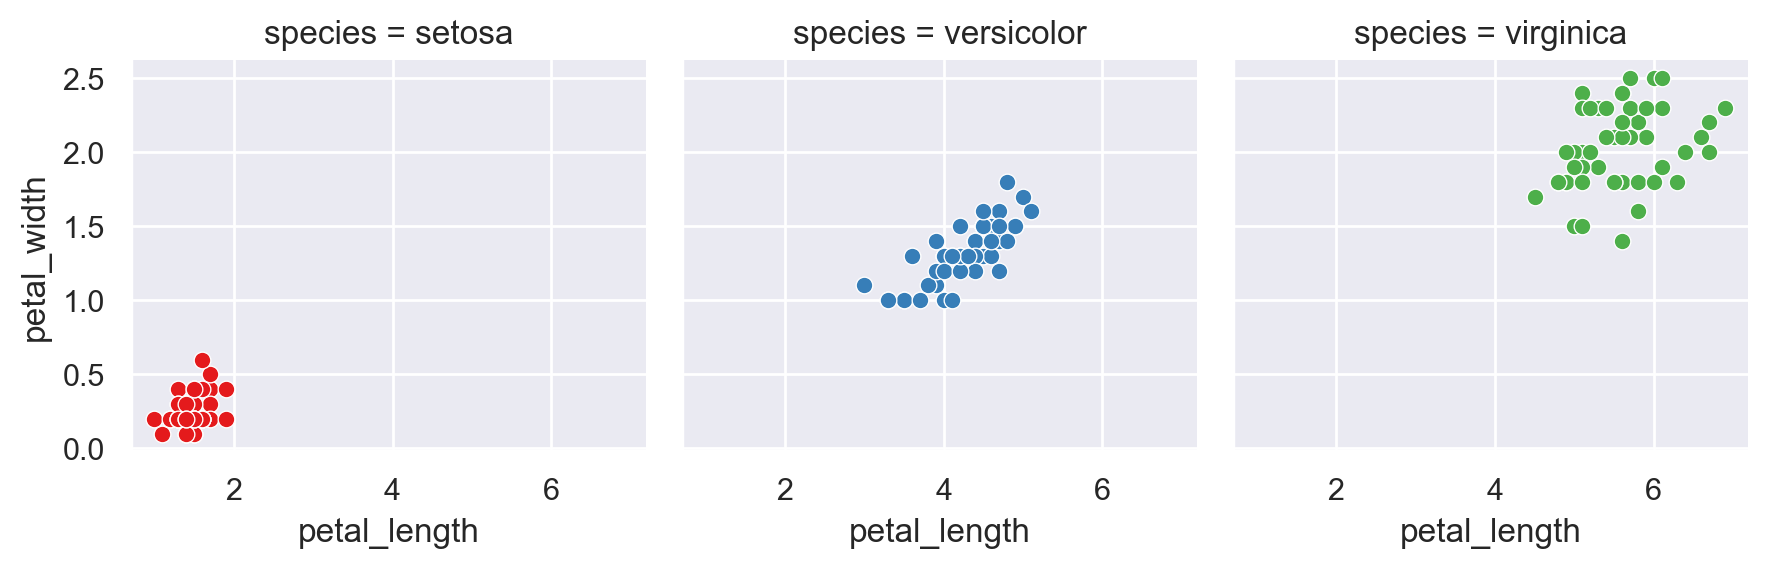

In [119]:
g= sns.FacetGrid(iris, col='species',hue='species')
g.map(sns.scatterplot,'petal_length','petal_width')
plt.savefig('data/ch13.png')

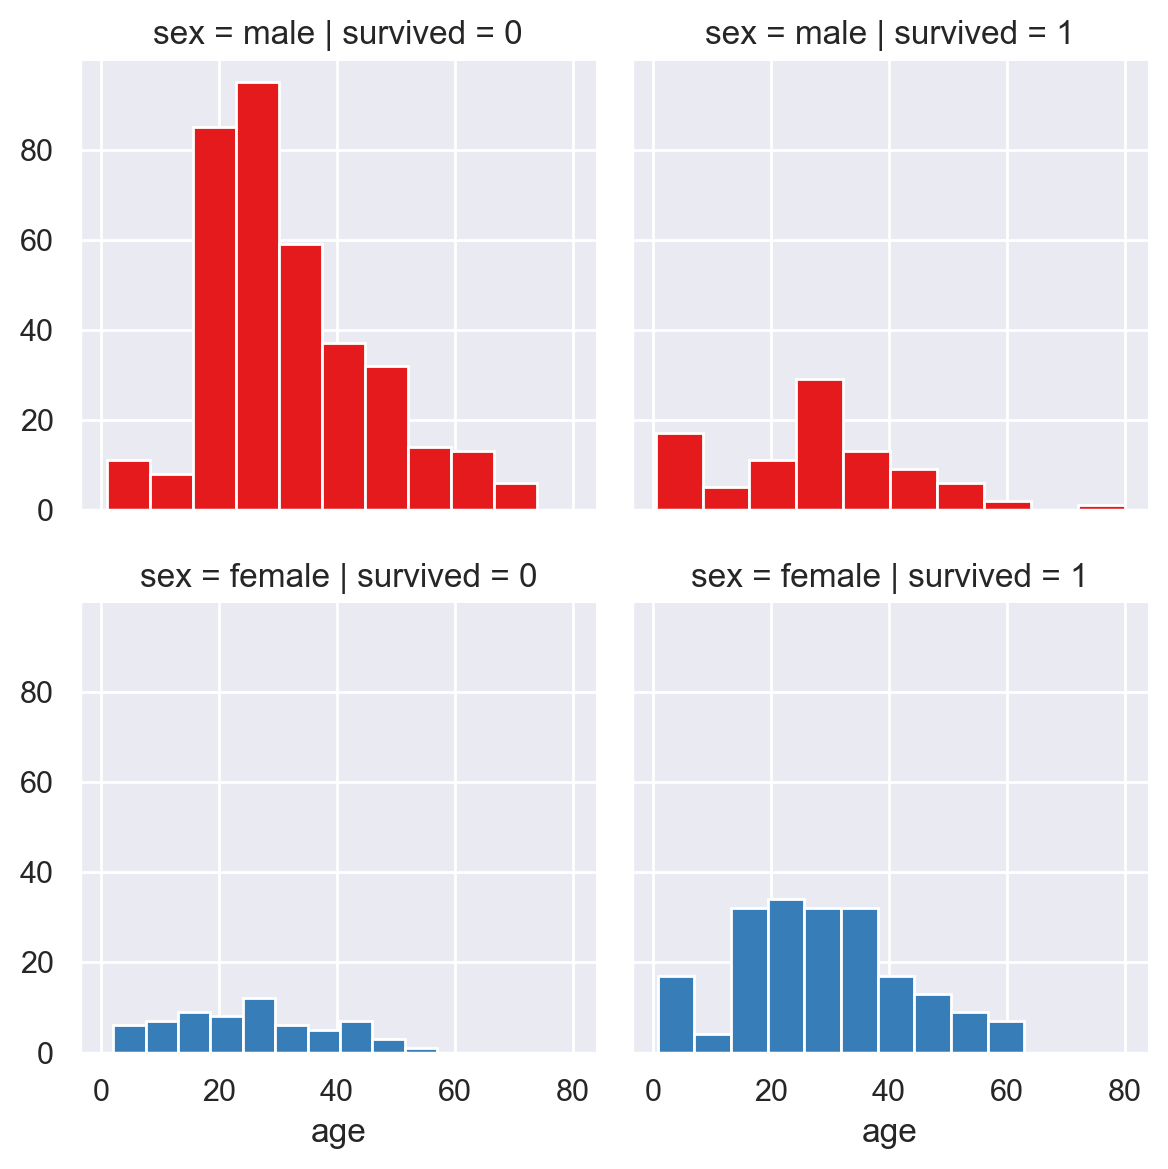

In [120]:
g= sns.FacetGrid(titanic,col='survived',hue='sex',row='sex')
g.map(plt.hist,"age")